In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [57]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [58]:
data.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [59]:
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [60]:
data.shape

(267, 9)

In [61]:
data.dropna(axis=0, inplace=True)

In [62]:
data.shape

(267, 9)

In [63]:
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [64]:
data.columns = ['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labor Participation',
                'Region','longitude','latitude']

In [65]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst = True)

In [66]:
data['Frequency']= data['Frequency'].astype('category')
data['Region']= data['Region'].astype('category')
data['Month_number'] = data['Date'].dt.month.apply(lambda x:int(x))

In [67]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labor Participation,Region,longitude,latitude,Month_number
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


# exploratory data analysis

In [69]:
stats = data[['Estimated Unemployment Rate','Estimated Employed','Estimated Labor Participation']]
print(stats.describe())

       Estimated Unemployment Rate  Estimated Employed  \
count                   267.000000        2.670000e+02   
mean                     12.236929        1.396211e+07   
std                      10.803283        1.336632e+07   
min                       0.500000        1.175420e+05   
25%                       4.845000        2.838930e+06   
50%                       9.650000        9.732417e+06   
75%                      16.755000        2.187869e+07   
max                      75.850000        5.943376e+07   

       Estimated Labor Participation  
count                     267.000000  
mean                       41.681573  
std                         7.845419  
min                        16.770000  
25%                        37.265000  
50%                        40.390000  
75%                        44.055000  
max                        69.690000  


In [70]:
data.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labor Participation,longitude,latitude,Month_number
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000


<AxesSubplot:>

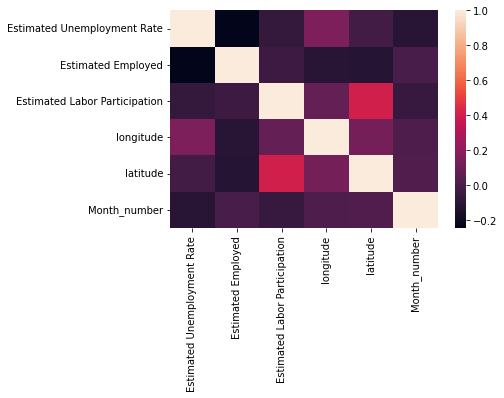

In [71]:
#correlation
sns.heatmap(data.corr())

In [72]:
# region wise umployement
rate = data[['Region','Estimated Unemployment Rate']].groupby('Region').mean()
print(rate)

           Estimated Unemployment Rate
Region                                
East                         13.916000
North                        15.889620
Northeast                    10.950263
South                        10.454667
West                          8.239000


In [73]:
print(data['Region'])

0      South
1      South
2      South
3      South
4      South
       ...  
262     East
263     East
264     East
265     East
266     East
Name: Region, Length: 267, dtype: category
Categories (5, object): ['East', 'North', 'Northeast', 'South', 'West']


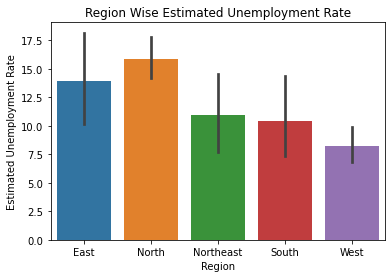

In [77]:
plt.figure()
sns.barplot(data=data, x = 'Region', y='Estimated Unemployment Rate')
plt.title('Region Wise Estimated Unemployment Rate')
plt.show()

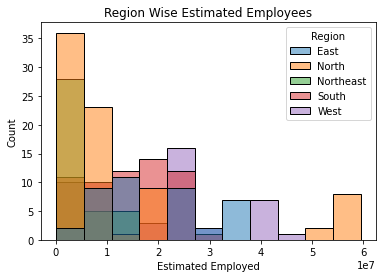

In [79]:
plt.figure()
sns.histplot(data=data,x='Estimated Employed', hue='Region')
plt.title('Region Wise Estimated Employees')
plt.show()

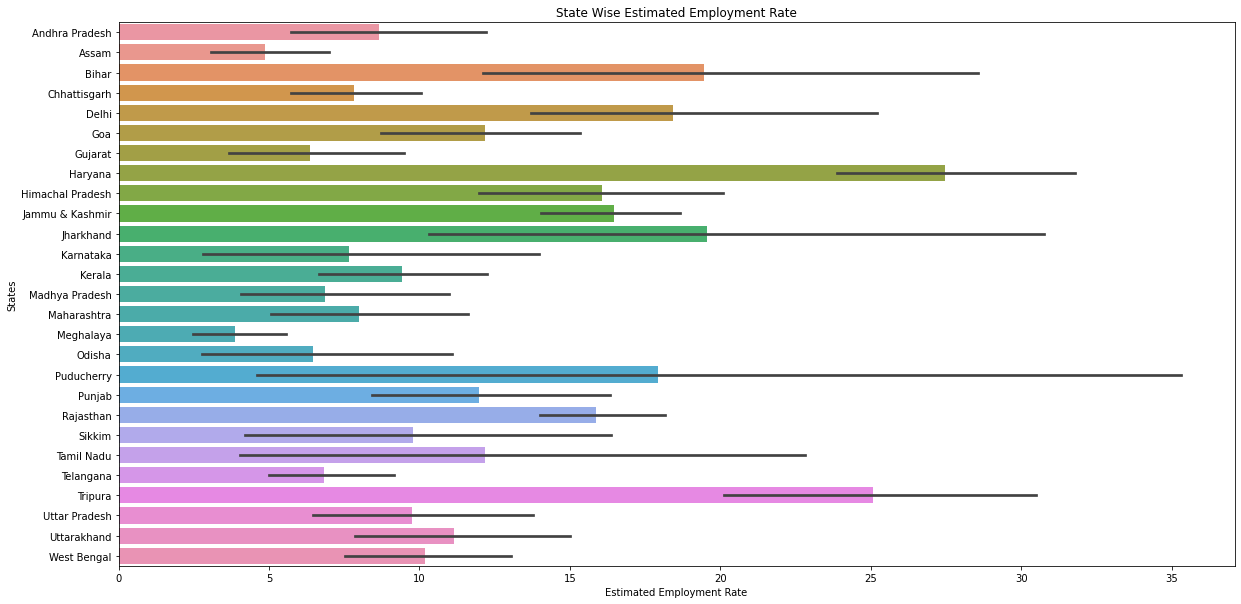

In [52]:
plt.figure(figsize = (20,10))
sns.barplot(data=data,y='States',x='Estimated Employment Rate', orient='h')
plt.title('State Wise Estimated Employment Rate')
plt.show()